<a href="https://colab.research.google.com/github/msc-acse/acse-9-independent-research-project-Garethlomax/blob/hdf5/HDF5_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#hdf5 implementation of the dataset
Implementation of the hdf5 sequence dataset with lazy loading. 

#IMPORTS


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torchvision.transforms as transforms
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

import h5py

import matplotlib.pyplot as plt

# h5py conversion 
h5py.run_tests()



.....................................................x...................................................................x....................................s...s......ss.......................................................................................................ssssss...................................................................x....x.........................x......x.................................................ssss..................
----------------------------------------------------------------------
Ran 457 tests in 1.799s

OK (skipped=14, expected failures=6)


<unittest.runner.TextTestResult run=457 errors=0 failures=0>

#FUNCTIONS FROM MAIN NOTEBOOK


#DATASET


In [0]:
class SequenceDataset(Dataset):
    """simple data set wrapper 
    for the moving mnist dataset
    
    we use this as need to insert channel dimension in the data"""
    def __init__(self, predictor, ground_truth, transform = None):
        
        self.input_sequence = predictor
        
        self.output_sequence = ground_truth
        
        assert len(self.input_sequence.shape) == 5, "internal data should be : batch_size, sequence_length, channels, height, width"
        
        
#         print(self.input_sequence.shape)
        
       
    def __len__(self):
        return len(self.input_sequence)
    
    def __getitem__(self, i):
        """returns tuple of predictor and result sequence
        
        This should later be specified to return a valid number of steps in the future
        
        i.e can specify whether want input of 10 and to predict 5 ect."""
                

        
        return self.input_sequence[i], self.output_sequence[i]

In [0]:
class HDF5Dataset(Dataset):
    """dataset wrapper for hdf5 dataset to allow for lazy loading of data. This 
    allows ram to be conserved. 
    
    As the hdf5 dataset is not partitioned into test and validation, the dataset 
    takes a shuffled list of indices to allow specification of training and 
    validation sets.
    
    MAKE SURE TO CALL DEL ON GENERATED OBJECTS OTHERWISE WE WILL CLOG UP RAM
    
    """
    
    def __init__(self, path, index_map, transform = None):
        
        %cd /content/drive/My \Drive/masters_project/data 
        # changes directory to the one where needed.
        
        self.path = path
        
        self.index_map = index_map # maps to the index in the validation split
        # due to hdf5 lazy loading index map must be in ascending order.
        # this may be an issue as we should shuffle our dataset.
        # this will be raised as an issue as we consider a work around.
        # we should keep index map shuffled, and take the selection from the 
        # shuffled map and select in ascending order. 
        
        
        self.file = h5py.File(path, 'r')
        
        
        
        
        
        
    def __len__(self):
        return len(self.index_map)
    
    def __getitem__(self,i):
        
        i = self.index_map[i] # index maps from validation set to select new orders
#         print(i)
        if isinstance(i, list): # if i is a list. 
            i.sort() # sorts into ascending order as specified above
            
        """TODO: CHECK IF THIS RETURNS DOUBLE"""
        
        predictor = torch.tensor(self.file["predictor"][i])
        
        truth = torch.tensor(self.file["truth"][i])
        
        return predictor, truth
    

True

In [12]:


%pwd

!ls -F

mnist_test_seq.npy  test_set.hdf5  train_set.hdf5


# TEST


In [80]:
# try test set first


index = list(range(10))
index[1] = 5


test = HDF5Dataset(path = "train_set.hdf5", index_map = index)





/content/drive/My Drive/masters_project/data


[0, 5]


[0, 2, 5]


In [0]:
test_loader = DataLoader(test, batch_size = 2)


t
t
t
t
t


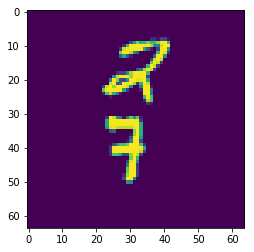

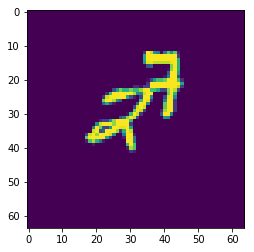

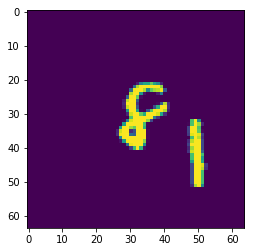

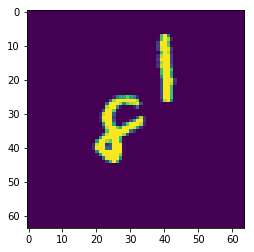

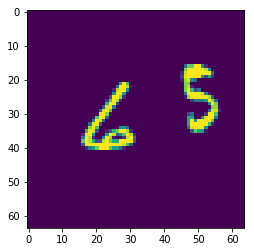

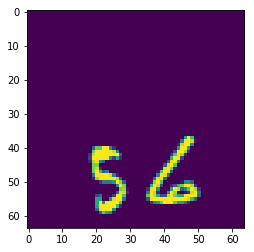

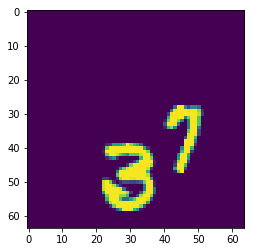

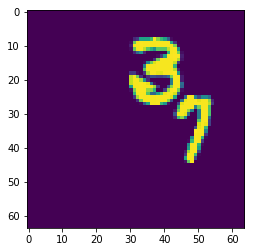

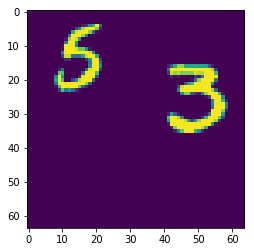

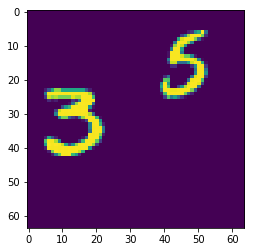

In [85]:
for x, y in test_loader:
#     print(x.shape)

    
    plt.figure()
    plt.imshow(x[0][0][0])
    plt.figure()
    plt.imshow(y[0][0][0])